In [10]:
import pandas as pd

In [11]:
# Load the dataset
shoe_df = pd.read_csv('C:/Users/ASUS/Documents/Semester 4/MPML_UAS/Men_Shoes.csv')
shoe_df.head()

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,"2,242","₹1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,₹674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,"16,662",₹588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,₹599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,₹982,Men's Velocity Runner Lp Running Shoe,4.0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

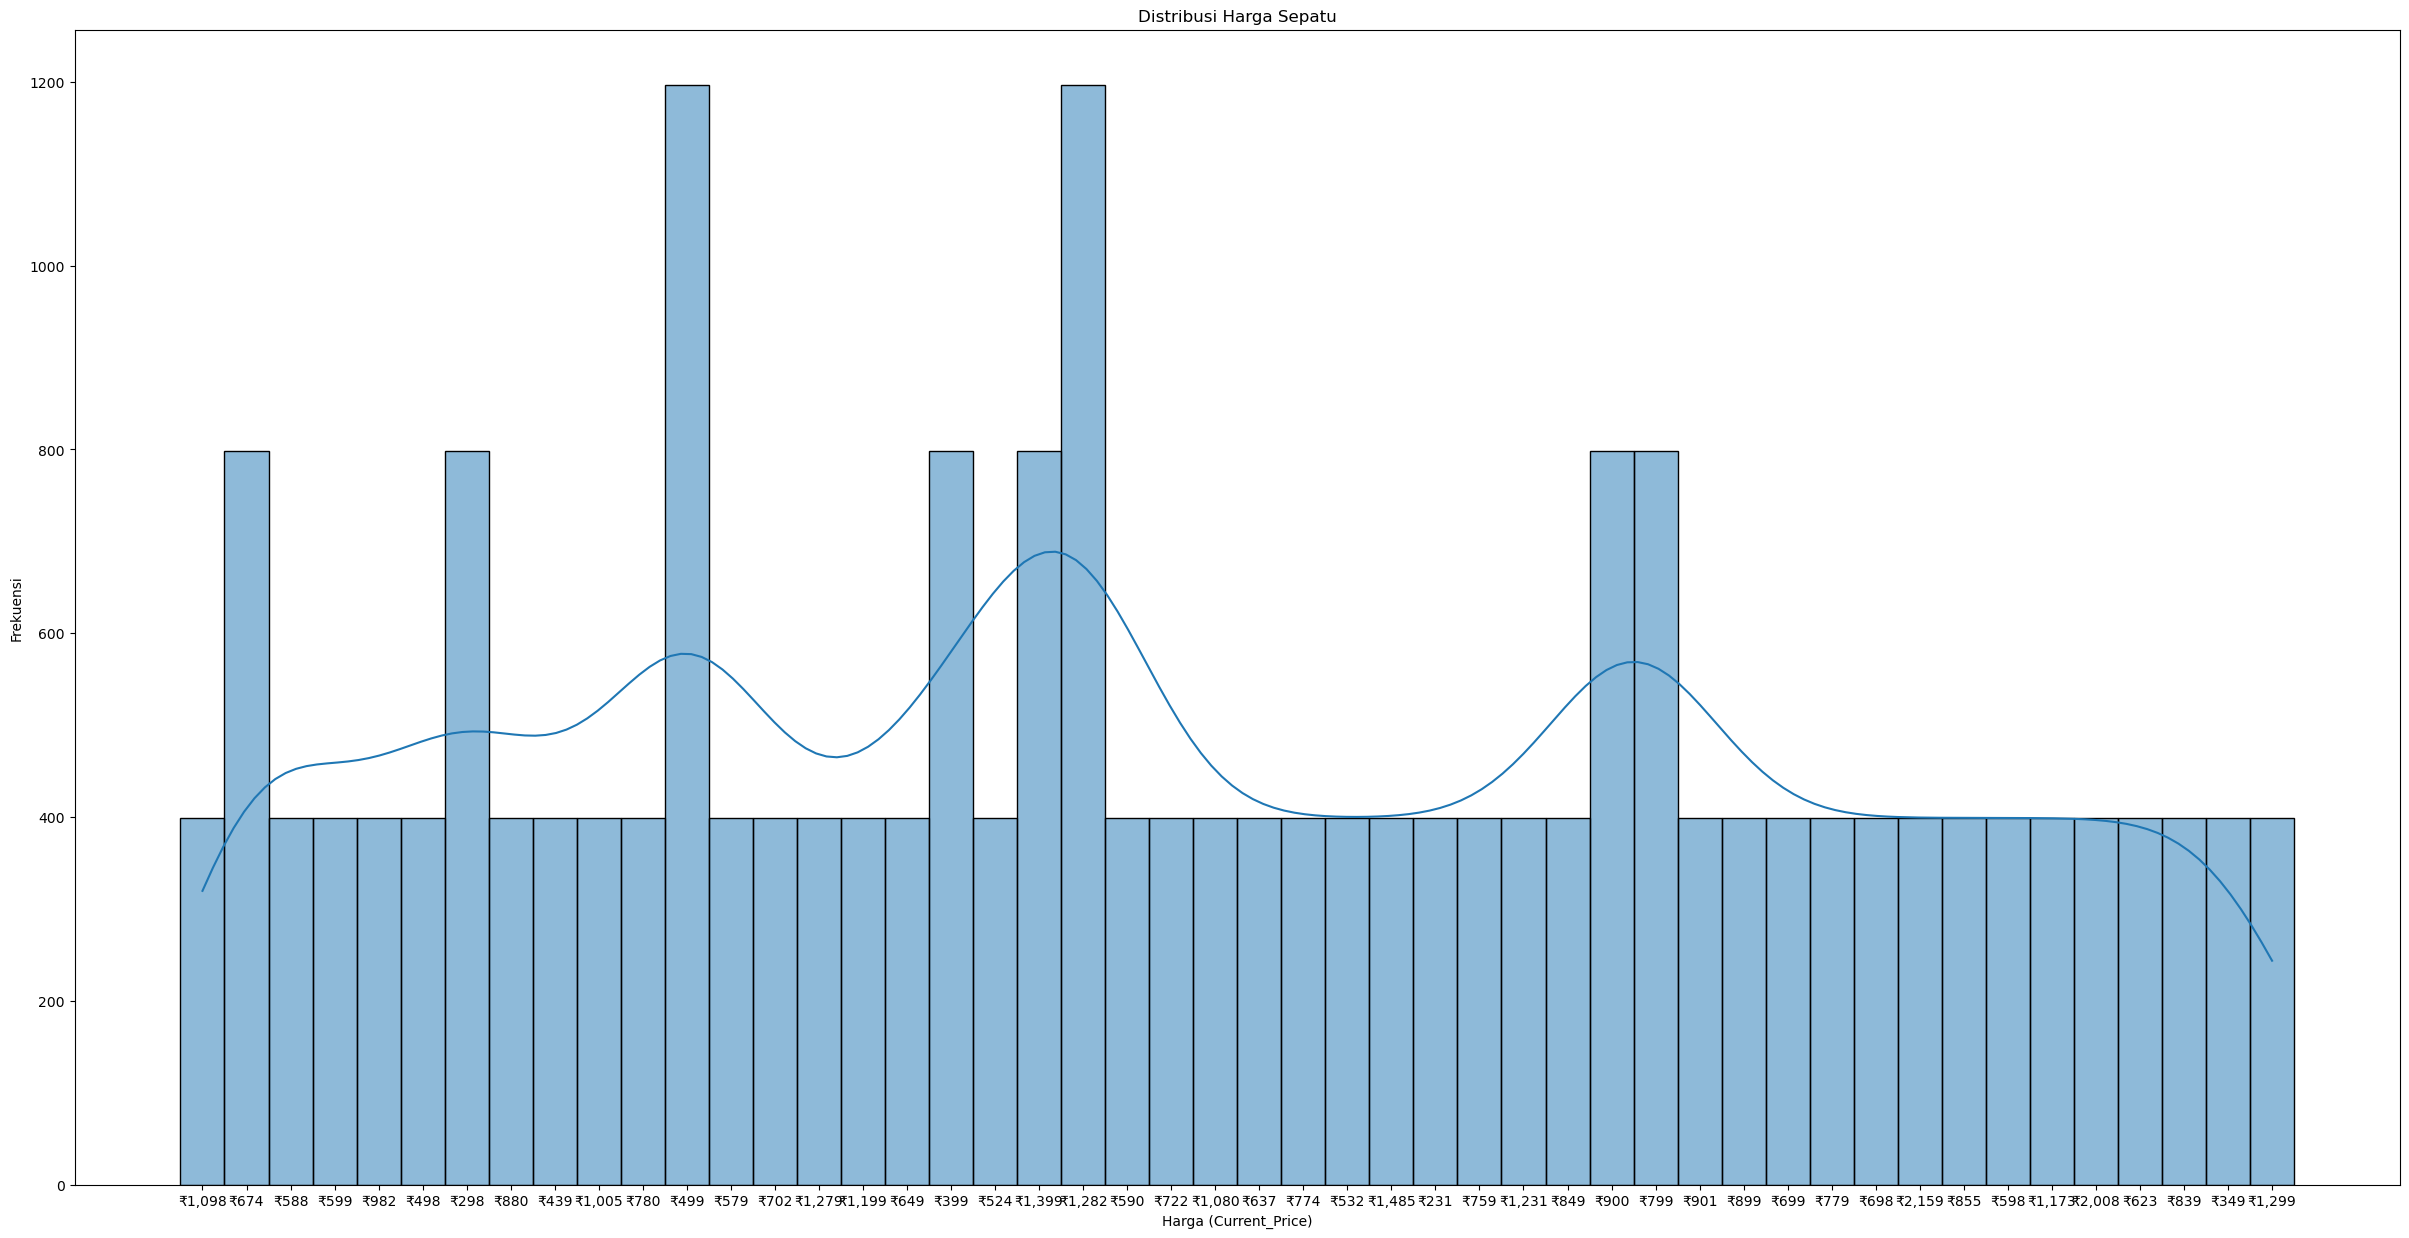

In [23]:
# Distribusi Harga (Current_Price)
plt.figure(figsize=(30, 15))
sns.histplot(shoe_df['Current_Price'], bins=50, kde=True)
plt.title('Distribusi Harga Sepatu')
plt.xlabel('Harga (Current_Price)')
plt.ylabel('Frekuensi')
plt.show()


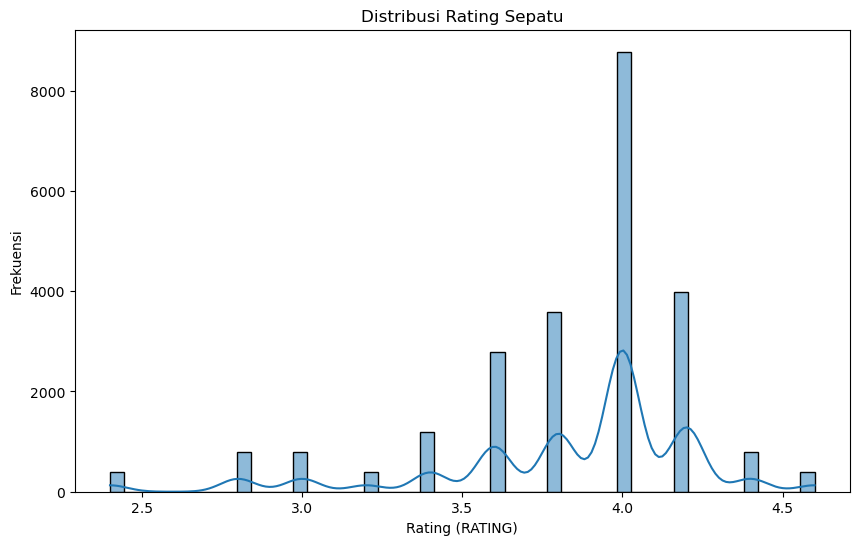

In [24]:
# Distribusi Rating (RATING)
plt.figure(figsize=(10, 6))
sns.histplot(shoe_df['RATING'], bins=50, kde=True)
plt.title('Distribusi Rating Sepatu')
plt.xlabel('Rating (RATING)')
plt.ylabel('Frekuensi')
plt.show()

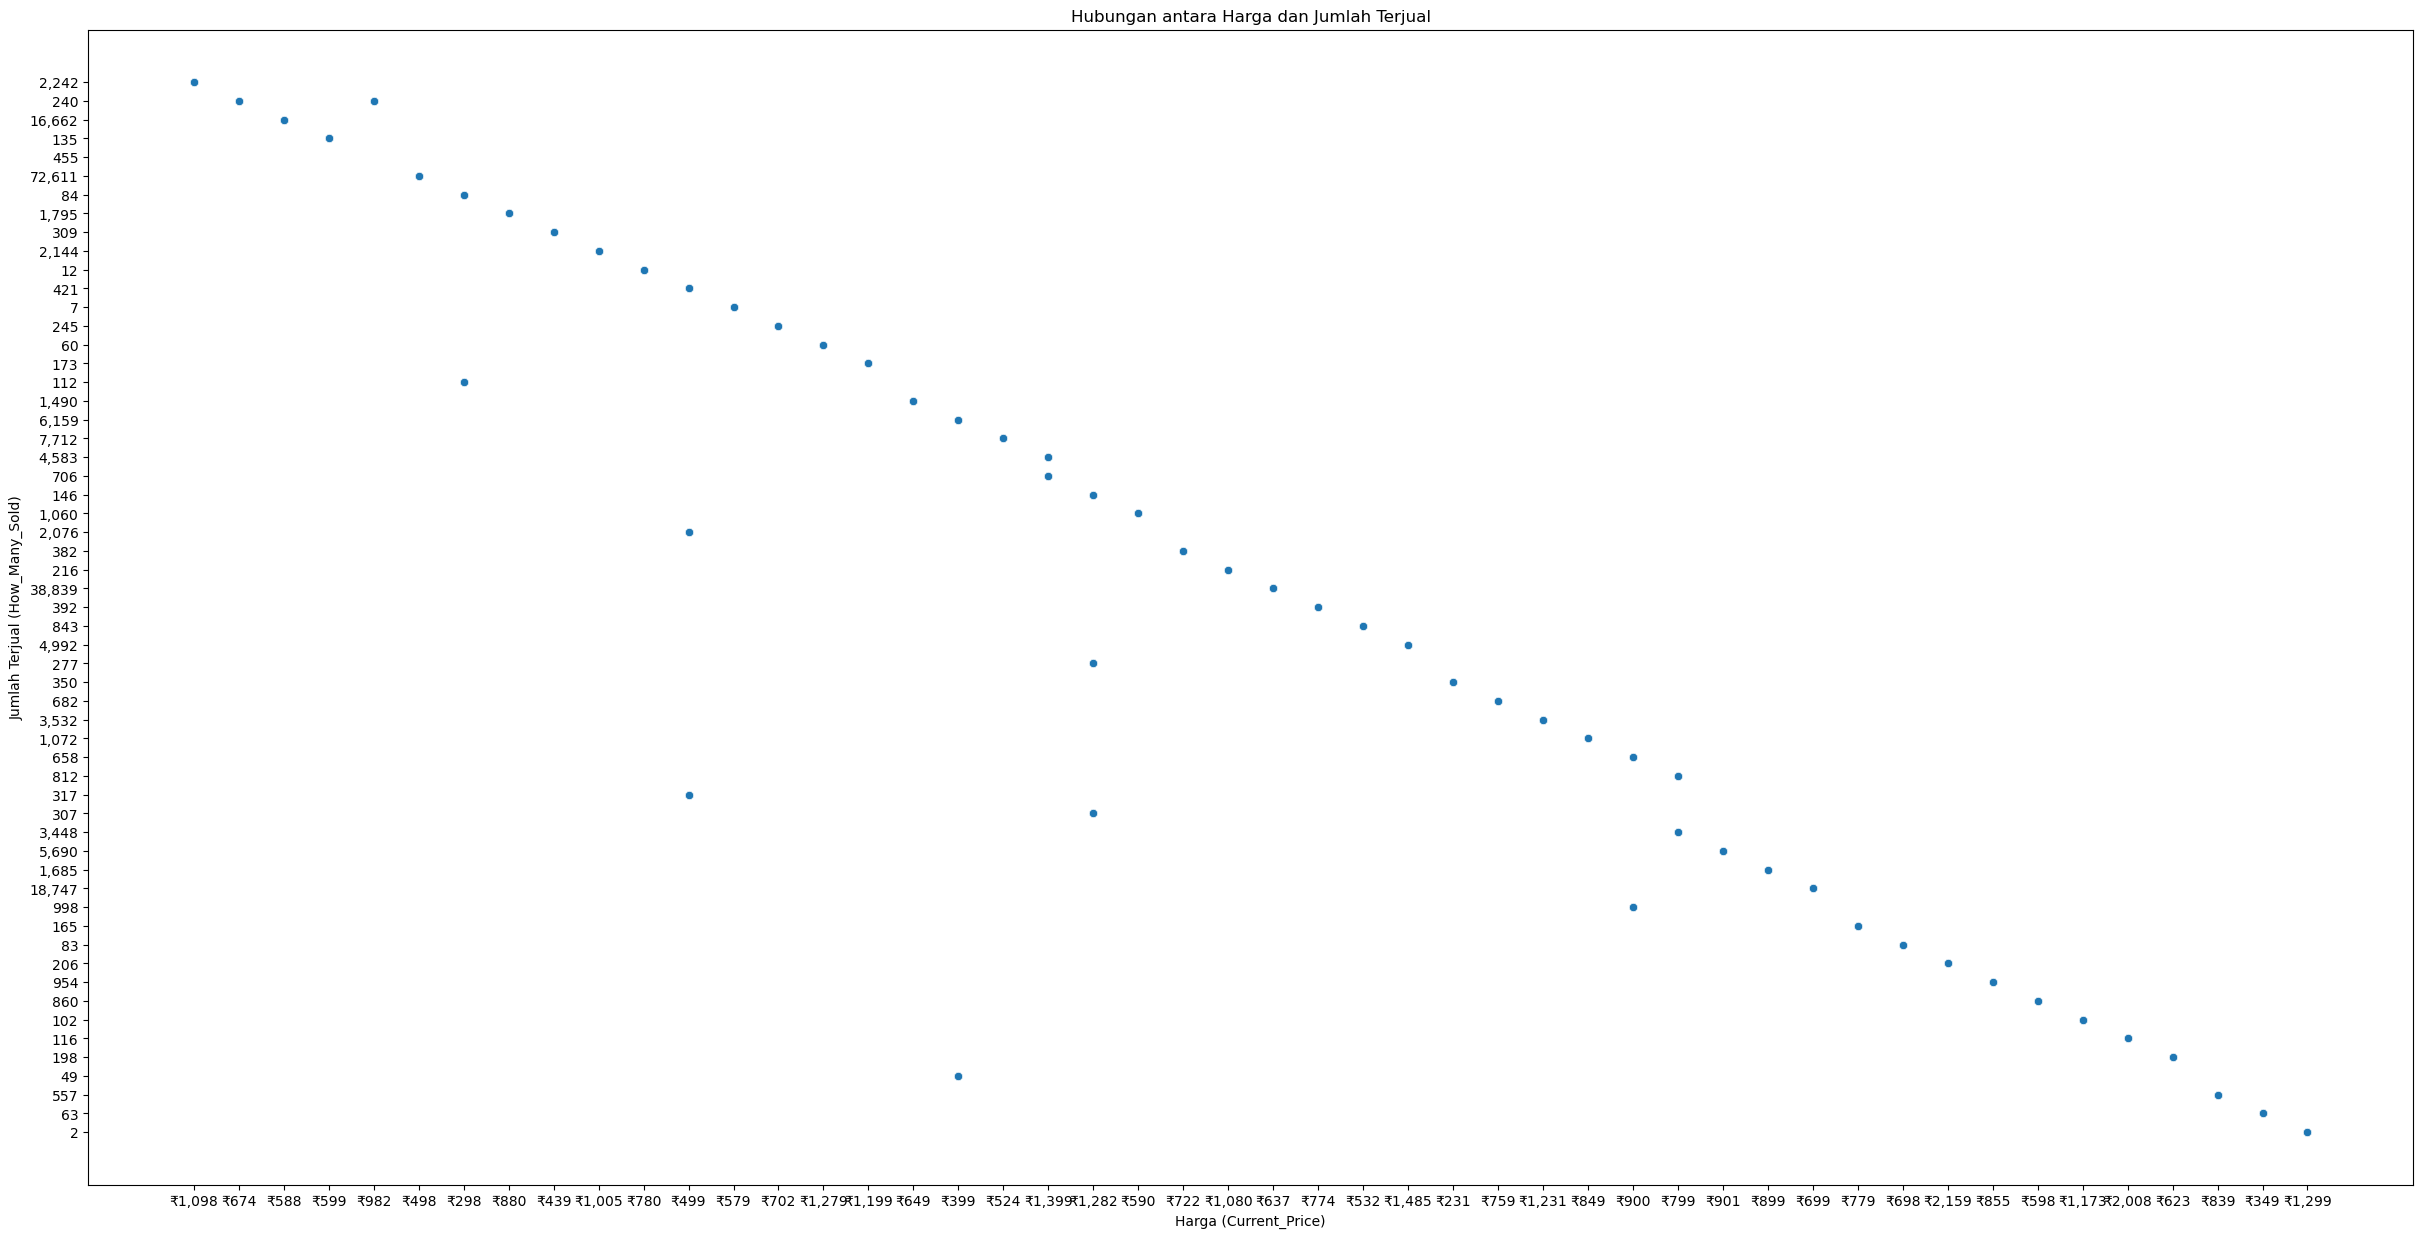

In [26]:
# Hubungan antara Harga dan Jumlah Terjual
plt.figure(figsize=(30, 15))
sns.scatterplot(x='Current_Price', y='How_Many_Sold', data=shoe_df)
plt.title('Hubungan antara Harga dan Jumlah Terjual')
plt.xlabel('Harga (Current_Price)')
plt.ylabel('Jumlah Terjual (How_Many_Sold)')
plt.show()


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

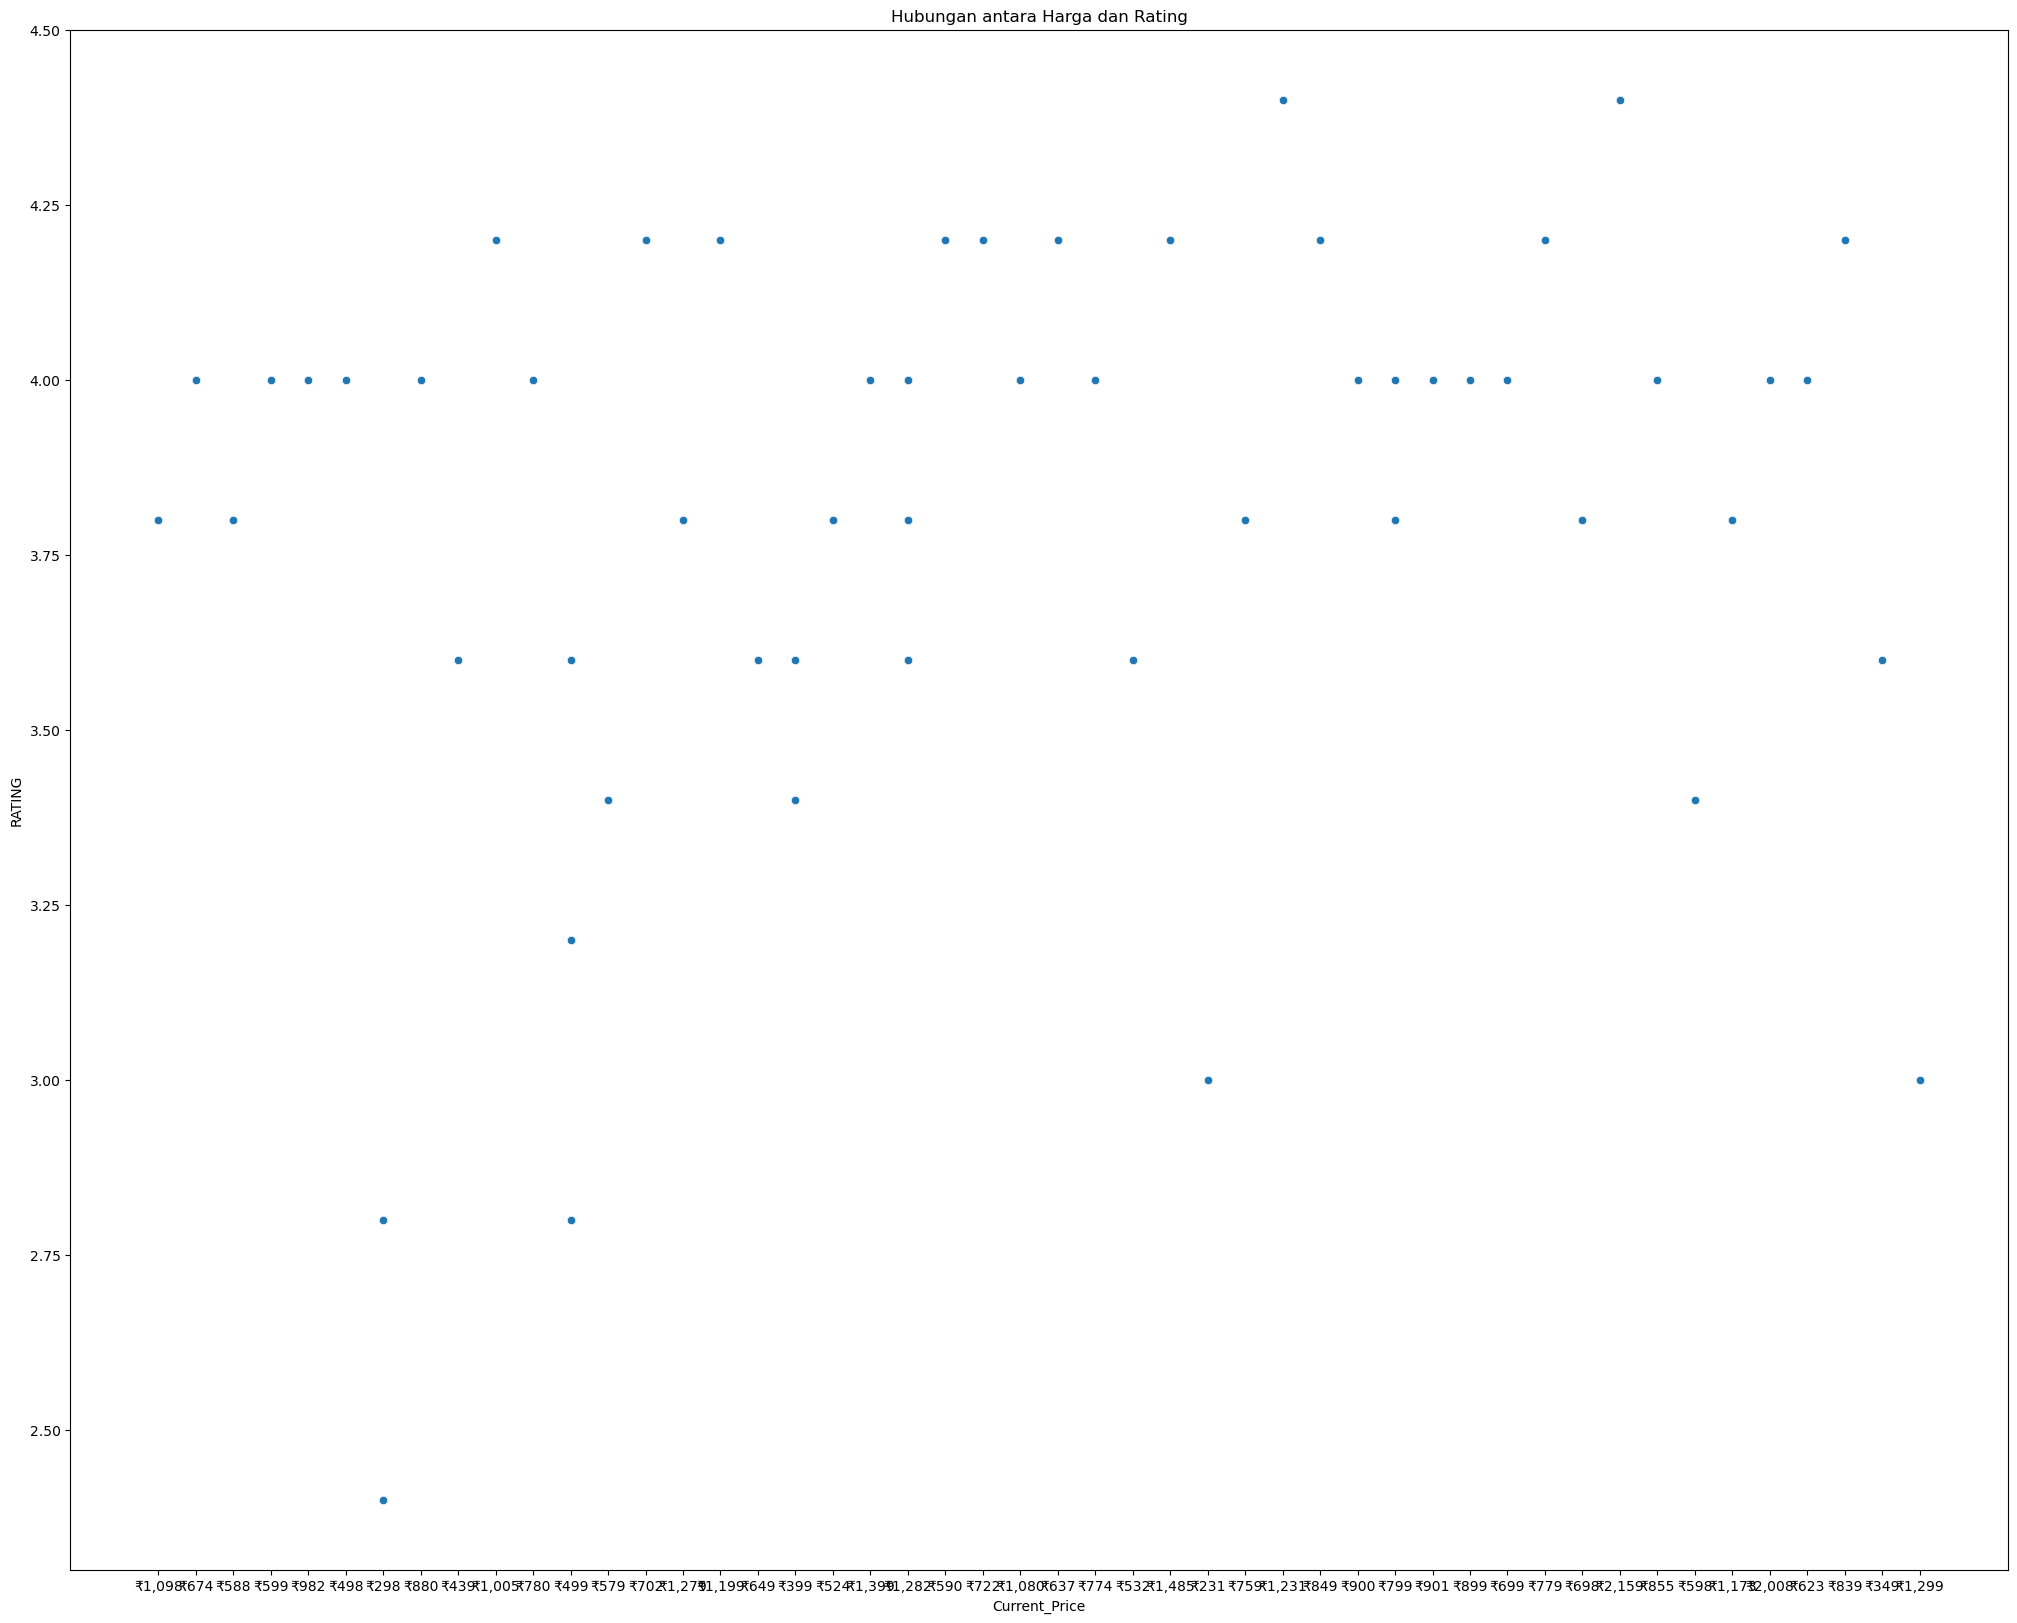

In [31]:
# Hubungan antara Harga dan Rating
plt.figure(figsize=(30, 20))
sns.scatterplot(x='Current_Price', y='RATING', data=shoe_df)
plt.title('Hubungan antara Harga dan Rating')
plt.xlabel

Tahap 2: Pra-Pemrosesan Data

In [45]:
# Check for missing values
print(shoe_df.isnull().sum())

# Fill missing values or drop rows/columns with missing values
shoe_df.fillna({'Current_Price': shoe_df['Current_Price'].median(), 'RATING': shoe_df['RATING'].median()}, inplace=True)
shoe_df.dropna(inplace=True)  # If rows are missing critical values


Brand_Name         0
How_Many_Sold      0
Current_Price      0
Product_details    0
RATING             0
dtype: int64


In [47]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Brand_Name'
label_encoder = LabelEncoder()
shoe_df['Brand_Name'] = label_encoder.fit_transform(shoe_df['Brand_Name'])

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
shoe_df[['Current_Price', 'How_Many_Sold', 'RATING']] = scaler.fit_transform(shoe_df[['Current_Price', 'How_Many_Sold', 'RATING']])


Stage 3

In [49]:
from sklearn.model_selection import train_test_split

X = shoe_df[['Brand_Name', 'Current_Price', 'RATING']]  # Features
y = shoe_df['How_Many_Sold']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [51]:
# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [52]:
# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [53]:
# SVM
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

In [55]:
def evaluate_model(predictions, y_true):
    print('Mean Absolute Error:', mean_absolute_error(y_true, predictions))
    print('Mean Squared Error:', mean_squared_error(y_true, predictions))
    print('Root Mean Squared Error:', mean_squared_error(y_true, predictions, squared=False))
    print('R-squared:', r2_score(y_true, predictions))

In [56]:
print("Decision Tree:")
evaluate_model(dt_predictions, y_test)

Decision Tree:
Mean Absolute Error: 0.0061928592077344115
Mean Squared Error: 0.0010117880118853235
Root Mean Squared Error: 0.031808615372023404
R-squared: 0.9989411597107939


c:\Users\ASUS\Documents\Semester 4\DE\dateng\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [57]:
print("Random Forest:")
evaluate_model(rf_predictions, y_test)

Random Forest:
Mean Absolute Error: 0.00619341060262513
Mean Squared Error: 0.0010121043046716484
Root Mean Squared Error: 0.031813586793564295
R-squared: 0.9989408287091005


c:\Users\ASUS\Documents\Semester 4\DE\dateng\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [58]:
print("SVM:")
evaluate_model(svm_predictions, y_test)

SVM:
Mean Absolute Error: 0.308764529942932
Mean Squared Error: 0.9479037927414763
Root Mean Squared Error: 0.9736035090022408
R-squared: 0.008014807196908613


c:\Users\ASUS\Documents\Semester 4\DE\dateng\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


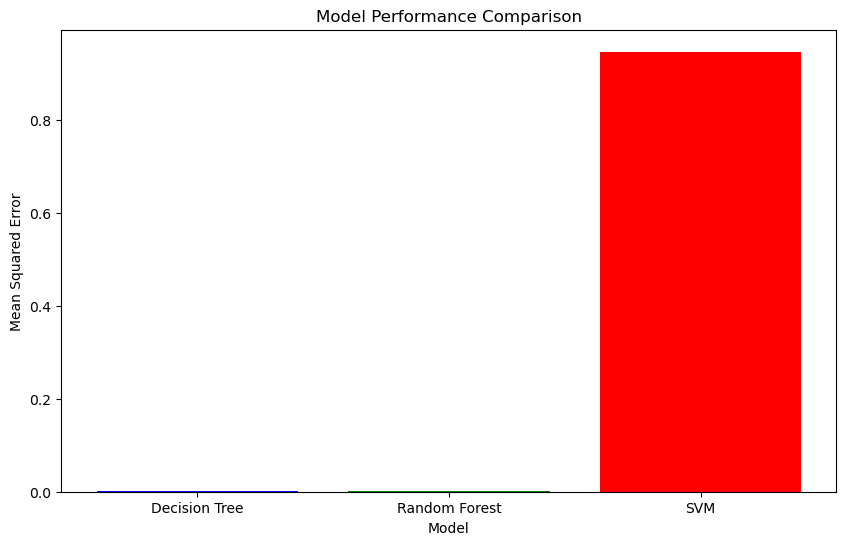

In [59]:
models = ['Decision Tree', 'Random Forest', 'SVM']
mse_values = [
    mean_squared_error(y_test, dt_predictions),
    mean_squared_error(y_test, rf_predictions),
    mean_squared_error(y_test, svm_predictions)
]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

Stage 4

In [68]:
import joblib

# Simpan model terbaik
joblib.dump(svm_predictions, 'model.pkl')

['model.pkl']

In [71]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the model
model = joblib.load('model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    prediction = model.predict([data['features']])
    return jsonify(prediction=prediction.tolist())

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'


 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

In [72]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Muat model
model = joblib.load('model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = np.array(data['features']).reshape(1, -1)
        prediction = model.predict(features)
        return jsonify(prediction=prediction.tolist())
    except Exception as e:
        return jsonify(error=str(e))

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1